___

<a href='https://www.udemy.com/user/joseportilla/'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright by Pierian Data Inc.</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Random Forest - Regression
## Plus: An Additional Analysis of Various Regression Methods!

## The Data

We just got hired by a tunnel boring company which uses X-rays in an attempt to know rock density, ideally this will allow them to switch out boring heads on their equipment before having to mine through the rock!

<img src='boring.jpg' height=400>

They have given us some lab test results of signal strength returned in nHz to their sensors for various rock density types tested. You will notice it has almost a sine wave like relationship, where signal strength oscillates based off the density, the researchers are unsure why this is, but

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../DATA/rock_density_xray.csv")

In [180]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [4]:
df.columns=['Signal',"Density"]
df.head()

,Signal,Density
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


<AxesSubplot:xlabel='Signal', ylabel='Density'>

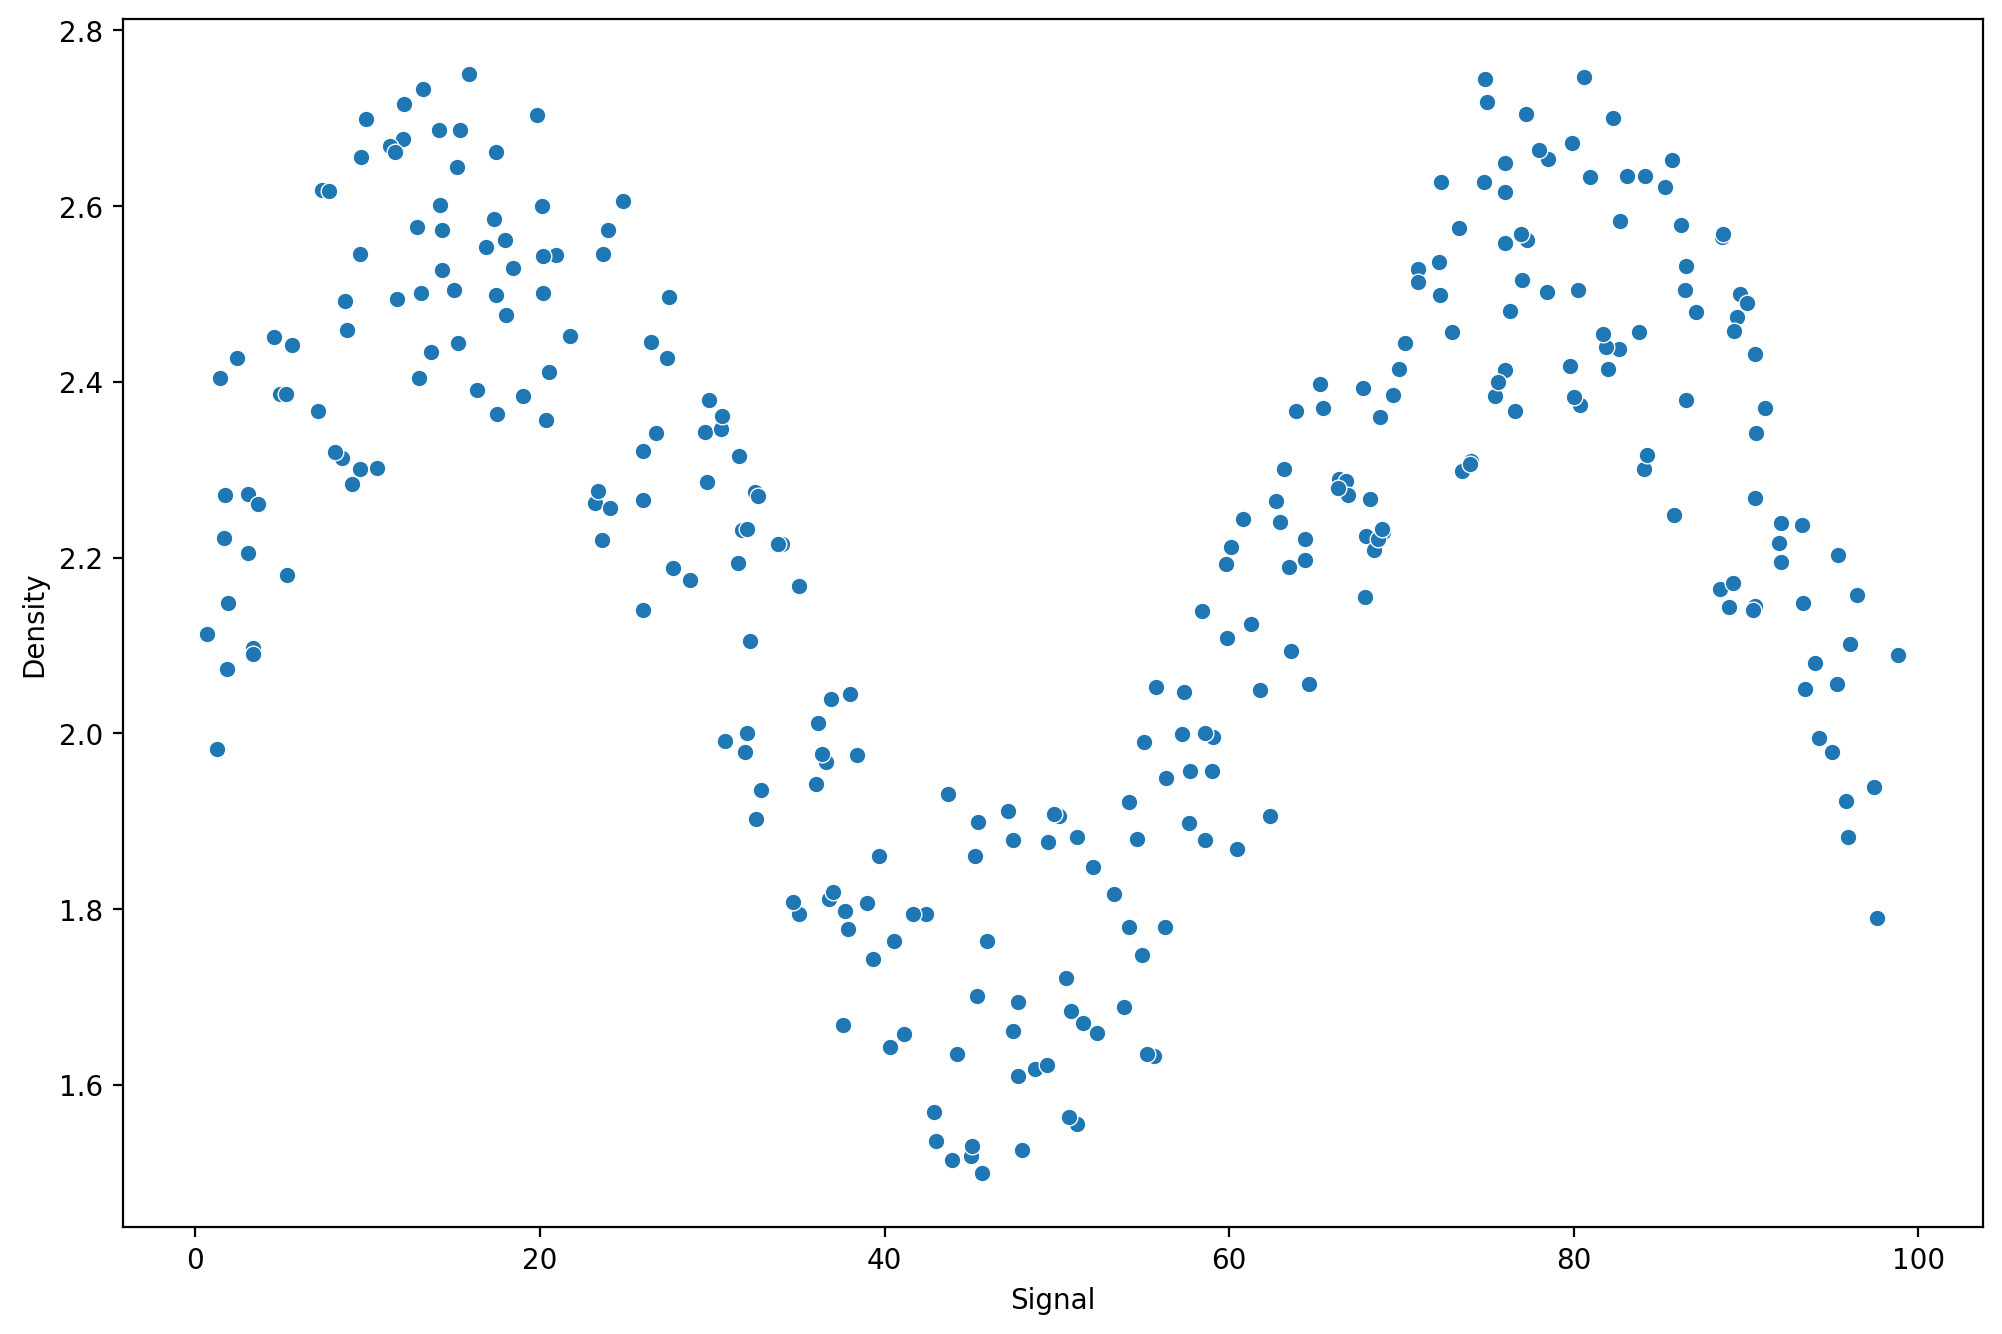

In [182]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x='Signal',y='Density',data=df)

---
---

## Splitting the Data

Let's split the data in order to be able to have a Test set for performance metric evaluation.

In [8]:
X = df['Signal'].values.reshape(-1,1)  
y = df['Density']

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

-----

# Linear Regression

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lr_model = LinearRegression()

In [13]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [14]:
lr_preds = lr_model.predict(X_test)

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [206]:
np.sqrt(mean_squared_error(y_test,lr_preds))

0.2570051996584629

In [16]:
mean_absolute_error(y_test,lr_preds)

0.211198973318633

What does the fit look like?

In [208]:
signal_range = np.arange(0,100)

In [210]:
lr_output = lr_model.predict(signal_range.reshape(-1,1))

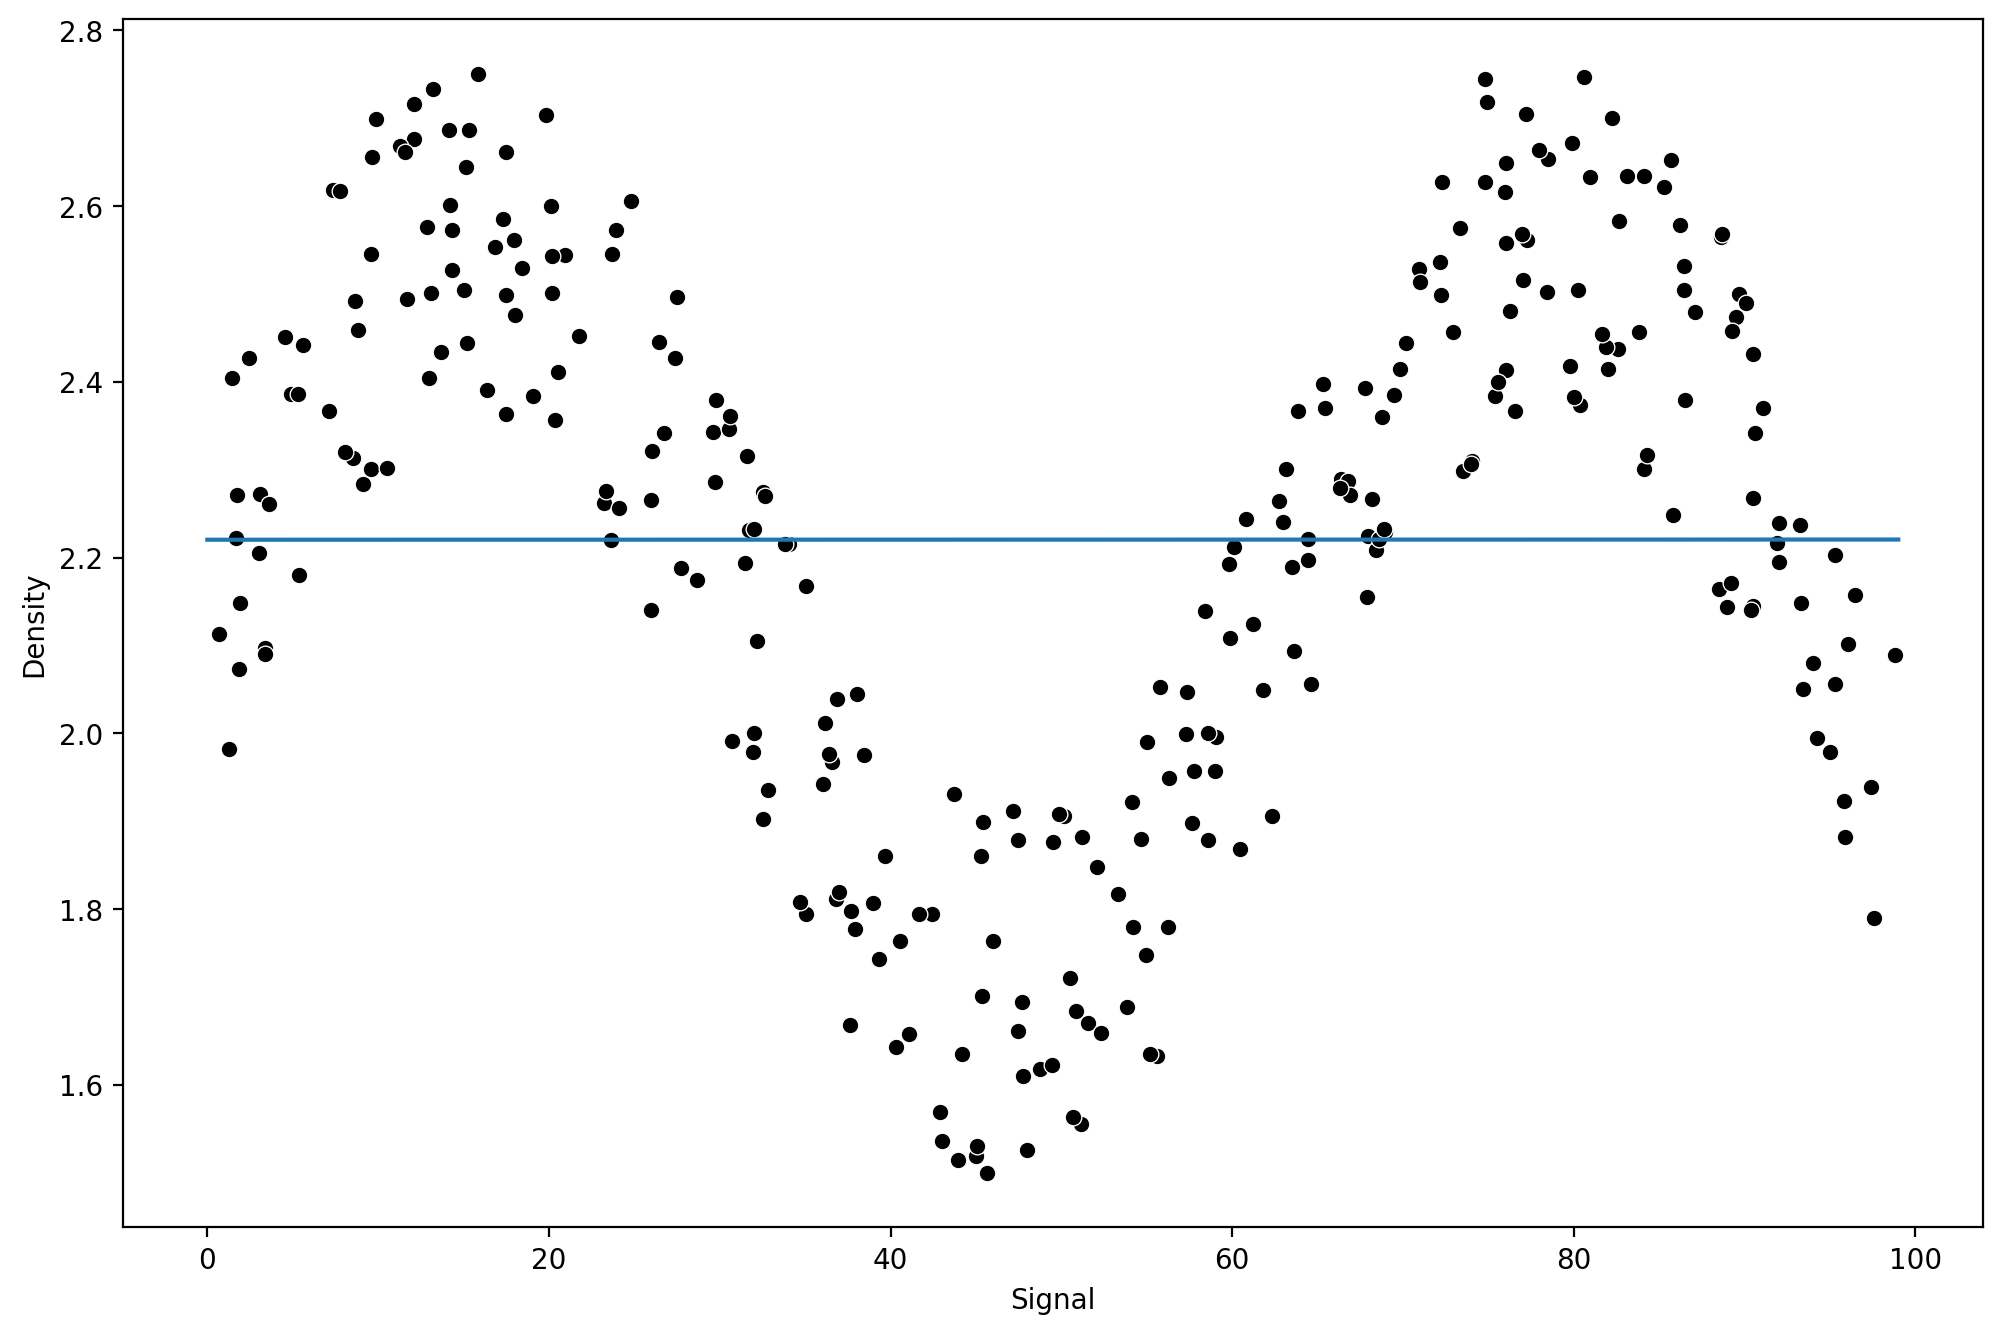

In [214]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x='Signal',y='Density',data=df,color='black')
plt.plot(signal_range,lr_output)

---

# Polynomial Regression

## Attempting with a Polynomial Regression Model

Let's explore why our standard regression approach of a polynomial could be difficult to fit here, keep in mind, we're in a fortunate situation where we can easily visualize results of y vs x.

## Function to Help Run Models

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [18]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    
    preds = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    mae=mean_absolute_error(y_test,preds)
    print(f'RMSE : {rmse}') 
    print(f'MAE : {mae}')
    
    # Plot results
    signal_range = np.arange(0,100)
    output = model.predict(signal_range.reshape(-1,1))
    
    
    plt.figure(figsize=(12,6),dpi=150)
    sns.scatterplot(x='Signal',y='Density',data=df,color='black')
    plt.plot(signal_range,output)

RMSE : 0.2570051996584629
MAE : 0.211198973318633


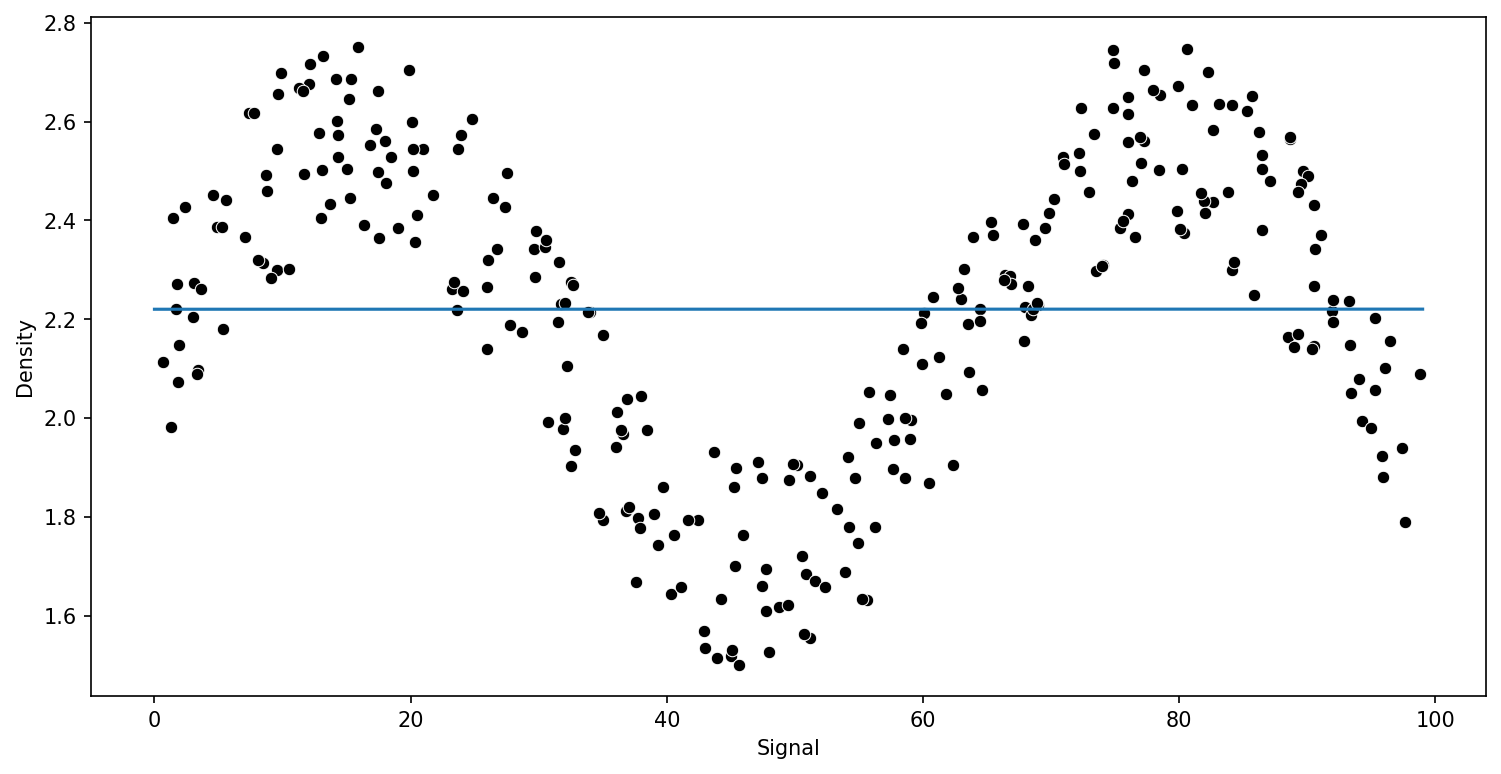

In [19]:
run_model(model,X_train,y_train,X_test,y_test)

## Pipeline for Poly Orders

In [20]:
from sklearn.pipeline import make_pipeline

In [21]:
from sklearn.preprocessing import PolynomialFeatures

In [22]:
pipe = make_pipeline(PolynomialFeatures(2),LinearRegression())

RMSE : 0.2817309563725596
MAE : 0.22903105443511335


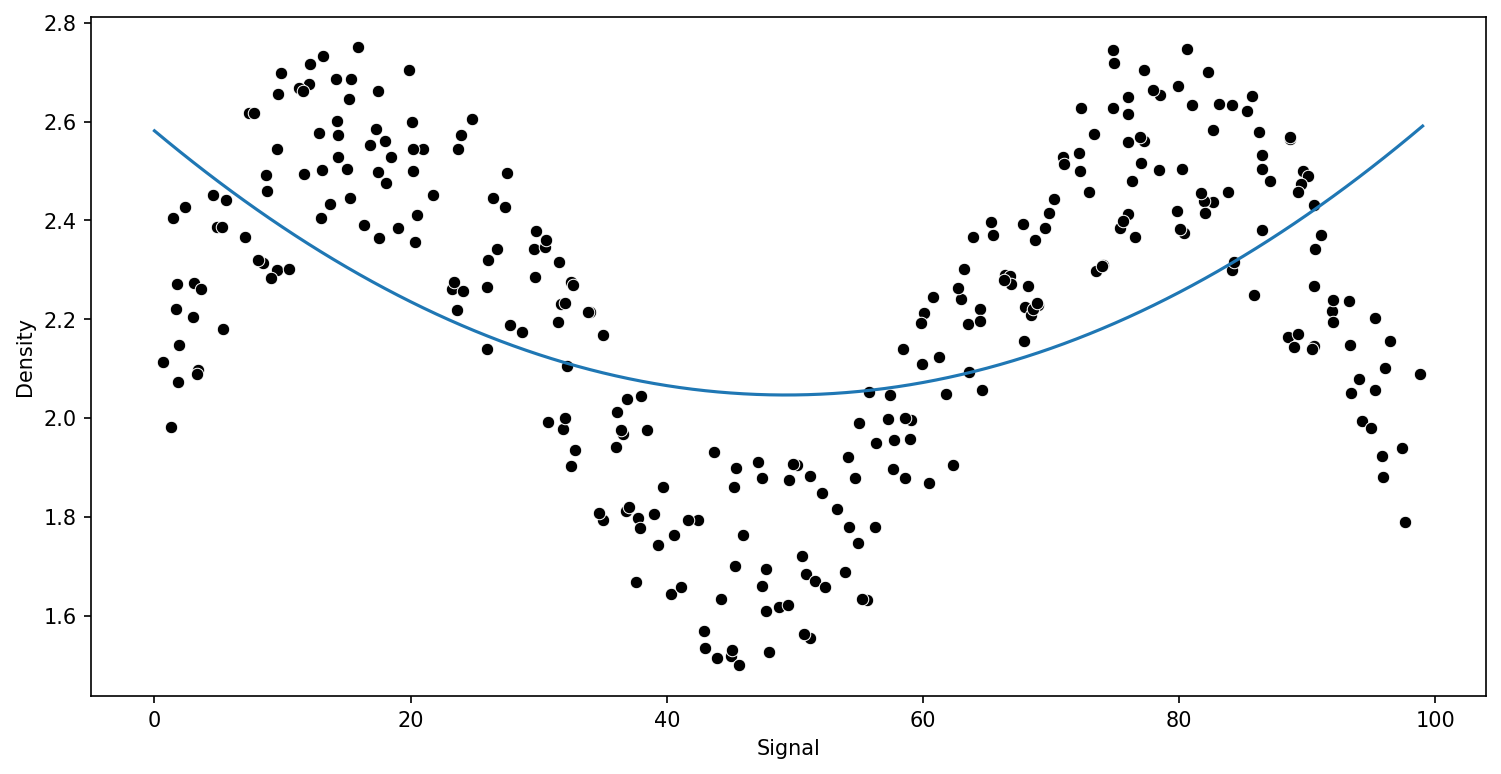

In [23]:
run_model(pipe,X_train,y_train,X_test,y_test)

## Comparing Various Polynomial Orders

RMSE : 0.1400917280701832
MAE : 0.12446909469912477


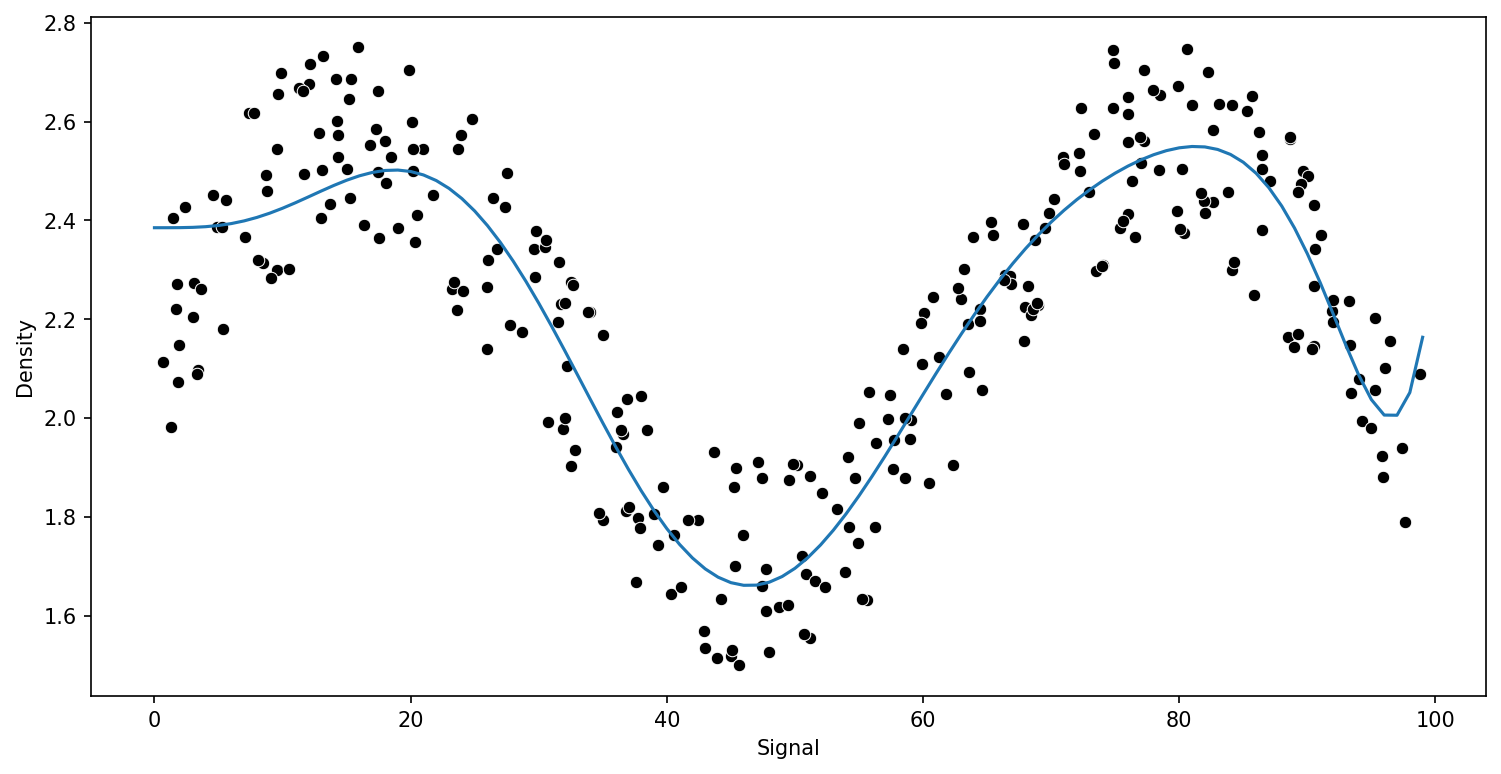

In [24]:
pipe = make_pipeline(PolynomialFeatures(10),LinearRegression())
run_model(pipe,X_train,y_train,X_test,y_test)

----

## KNN Regression

In [273]:
from sklearn.neighbors import KNeighborsRegressor

RMSE : 0.15234870286353372
RMSE : 0.13730685016923655
RMSE : 0.13277855732740926


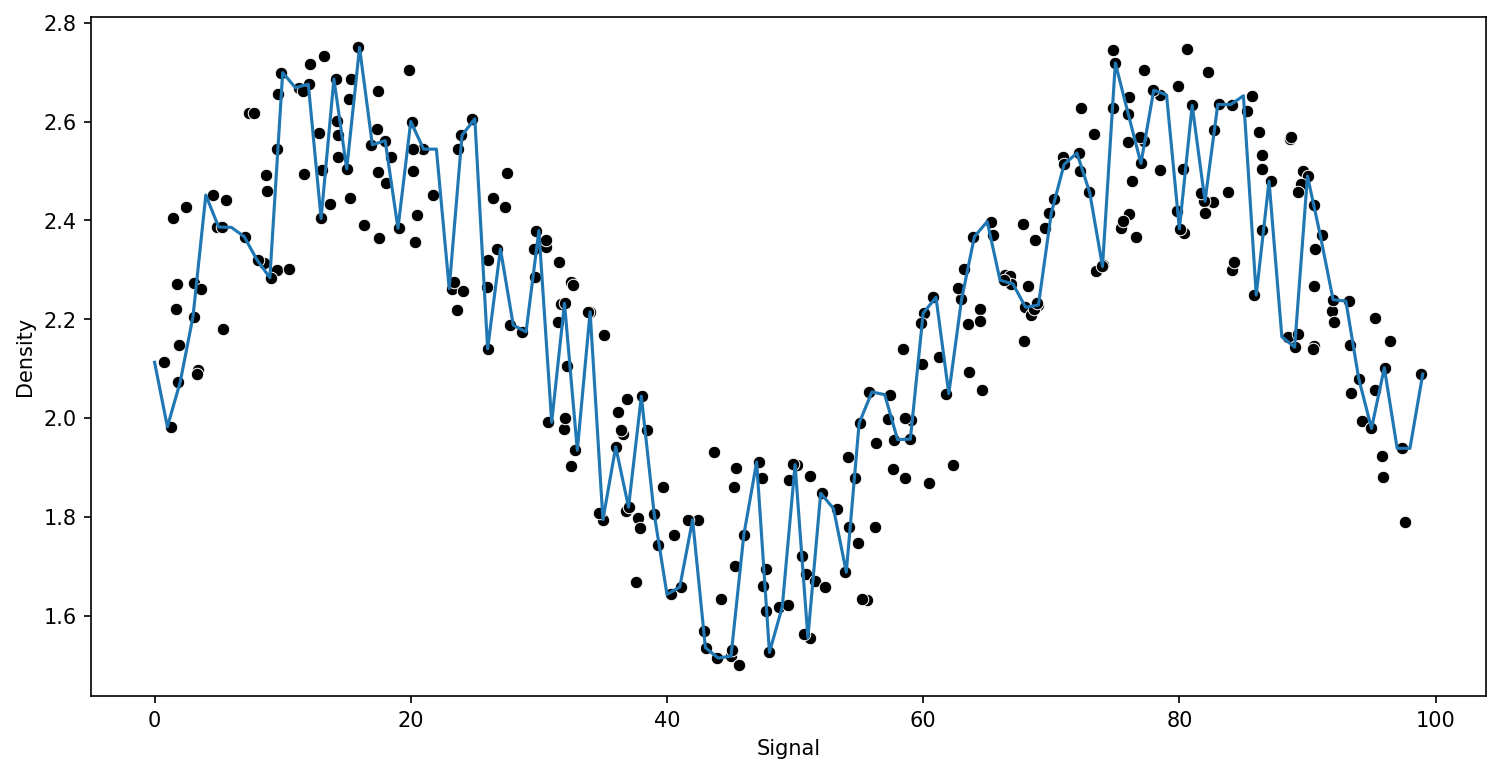

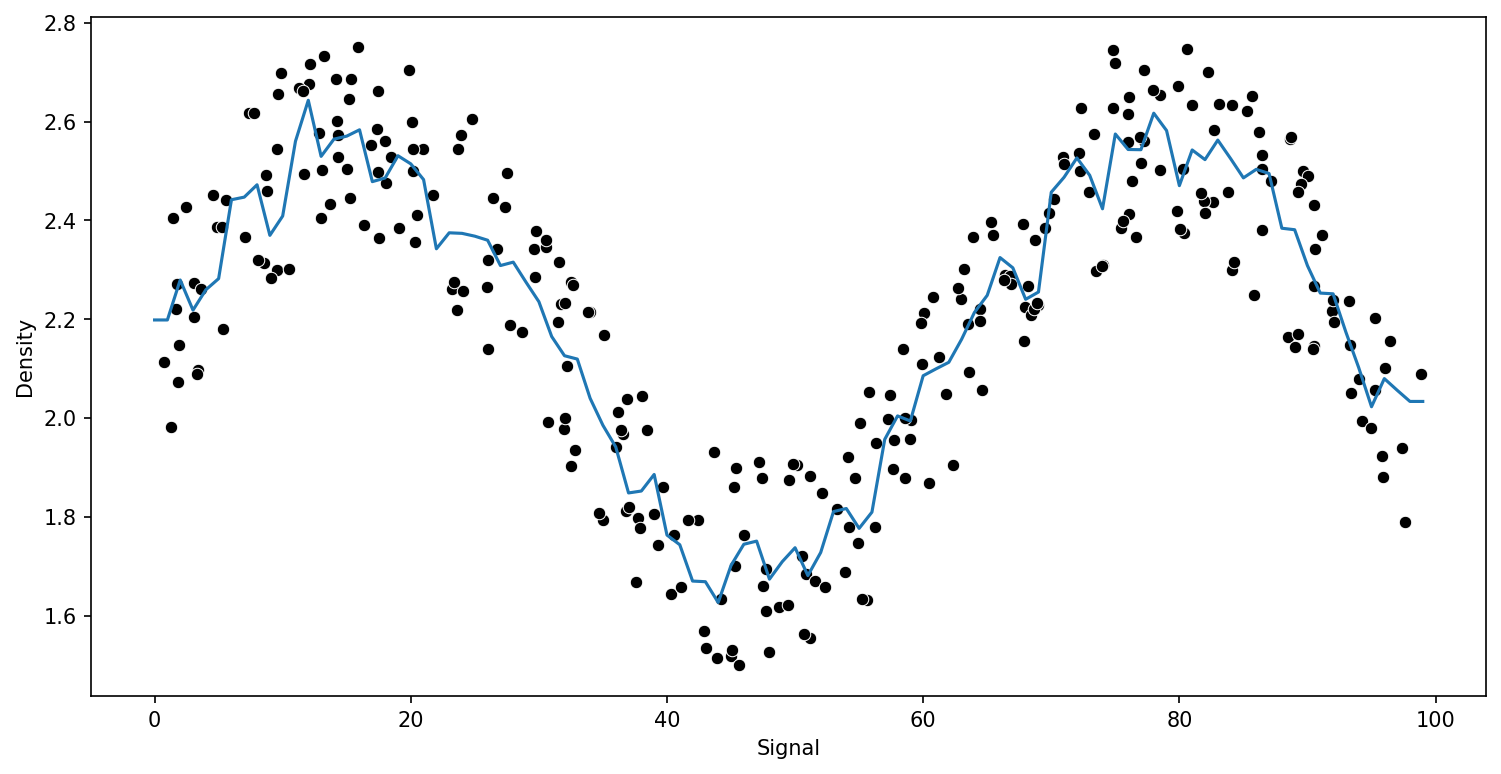

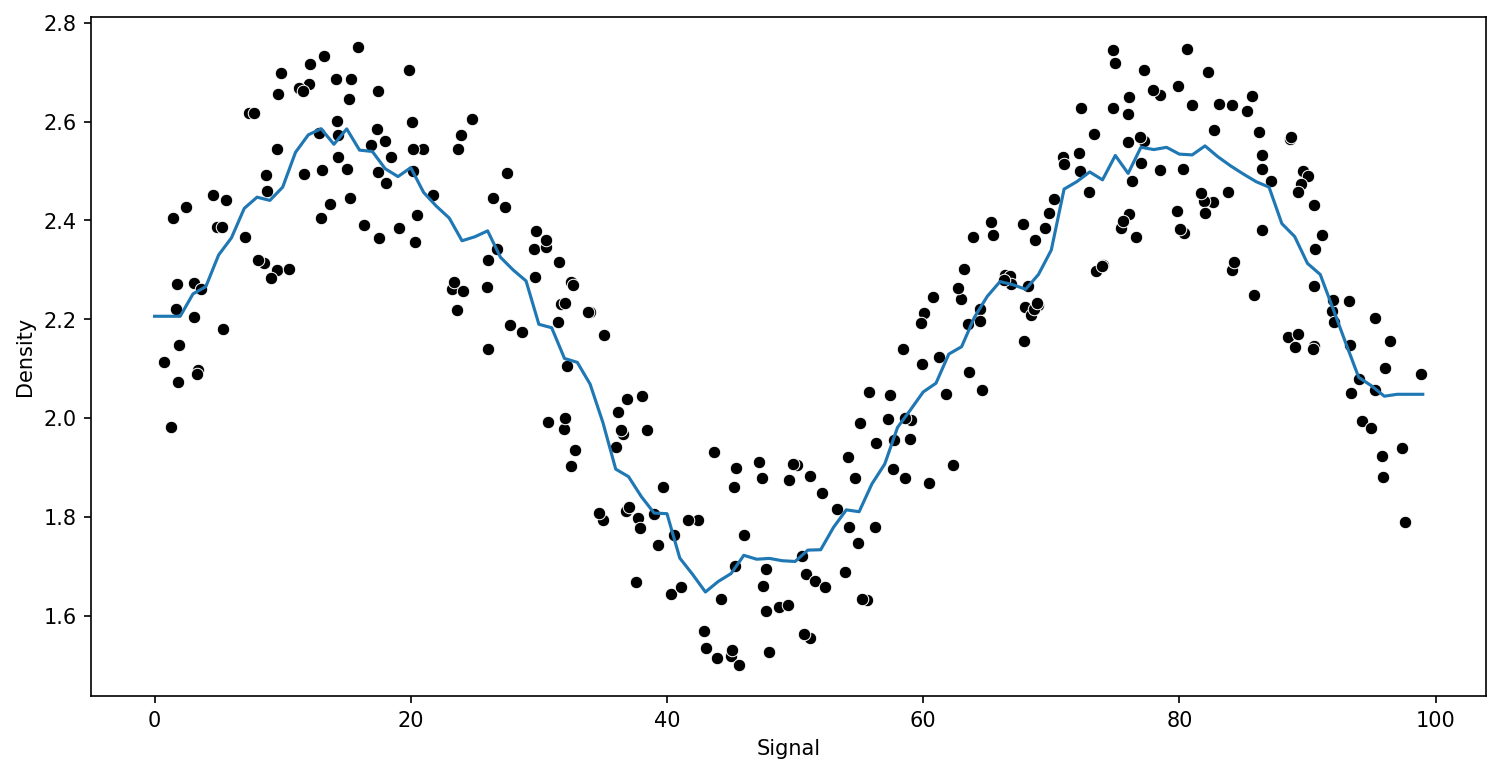

In [274]:
preds = {}
k_values = [1,5,10]
for n in k_values:
    
    
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model,X_train,y_train,X_test,y_test)

---
## Decision Tree Regression

In [25]:
from sklearn.tree import DecisionTreeRegressor

RMSE : 0.1523487028635337
MAE : 0.11877297474442378


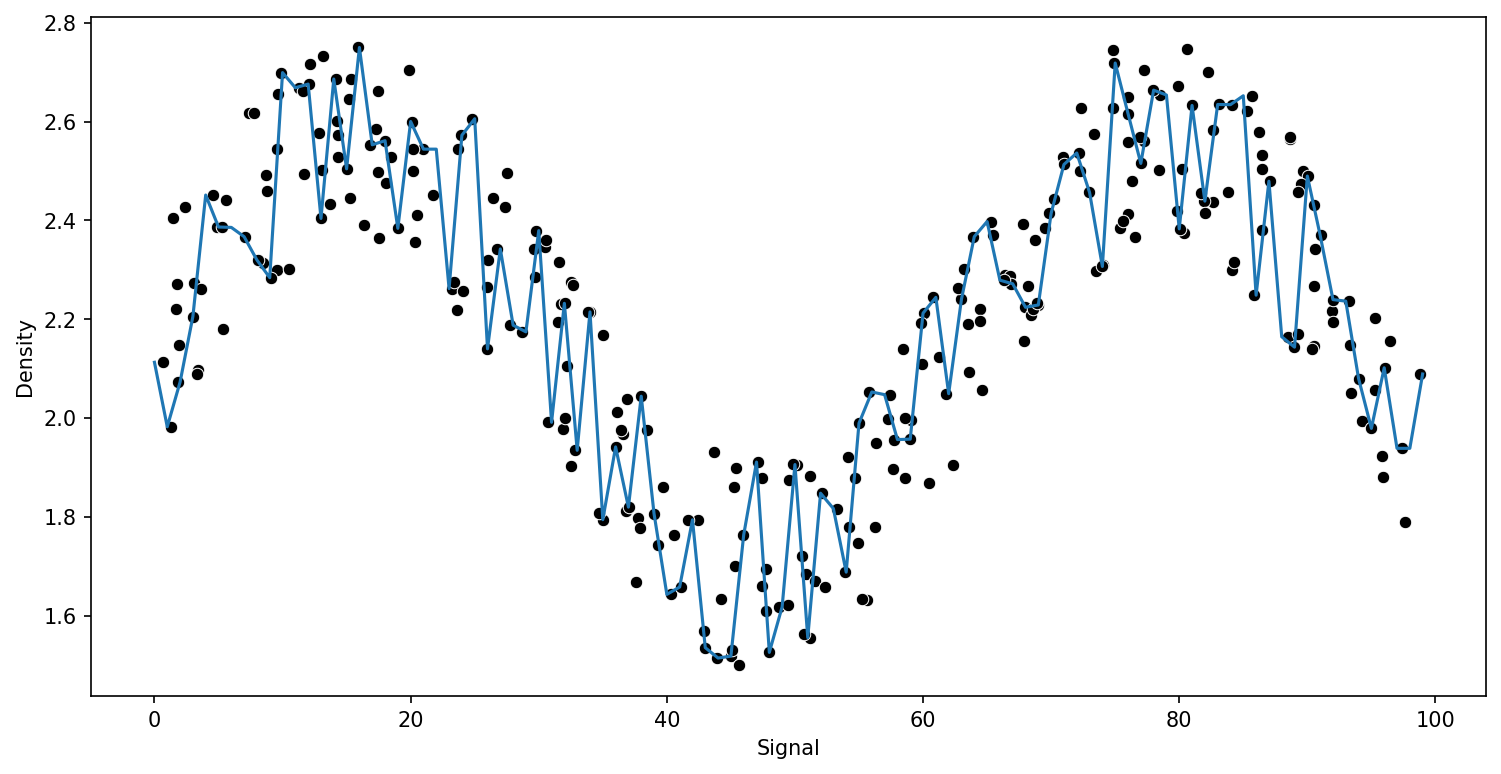

In [26]:
model = DecisionTreeRegressor()

run_model(model,X_train,y_train,X_test,y_test)

In [277]:
model.get_n_leaves()

270

----

## Support Vector Regression

In [27]:
from sklearn.svm import SVR

In [28]:
#for SVR, running GridSearchCV is a must, it's hard to know the default param is right or wrong 
from sklearn.model_selection import GridSearchCV

In [29]:
param_grid = {'C':[0.01,0.1,1,5,10,100,1000],'gamma':['auto','scale']}
svr = SVR()

In [33]:
grid = GridSearchCV(svr,param_grid)

RMSE : 0.12646999302046696
MAE : 0.10854210121348368


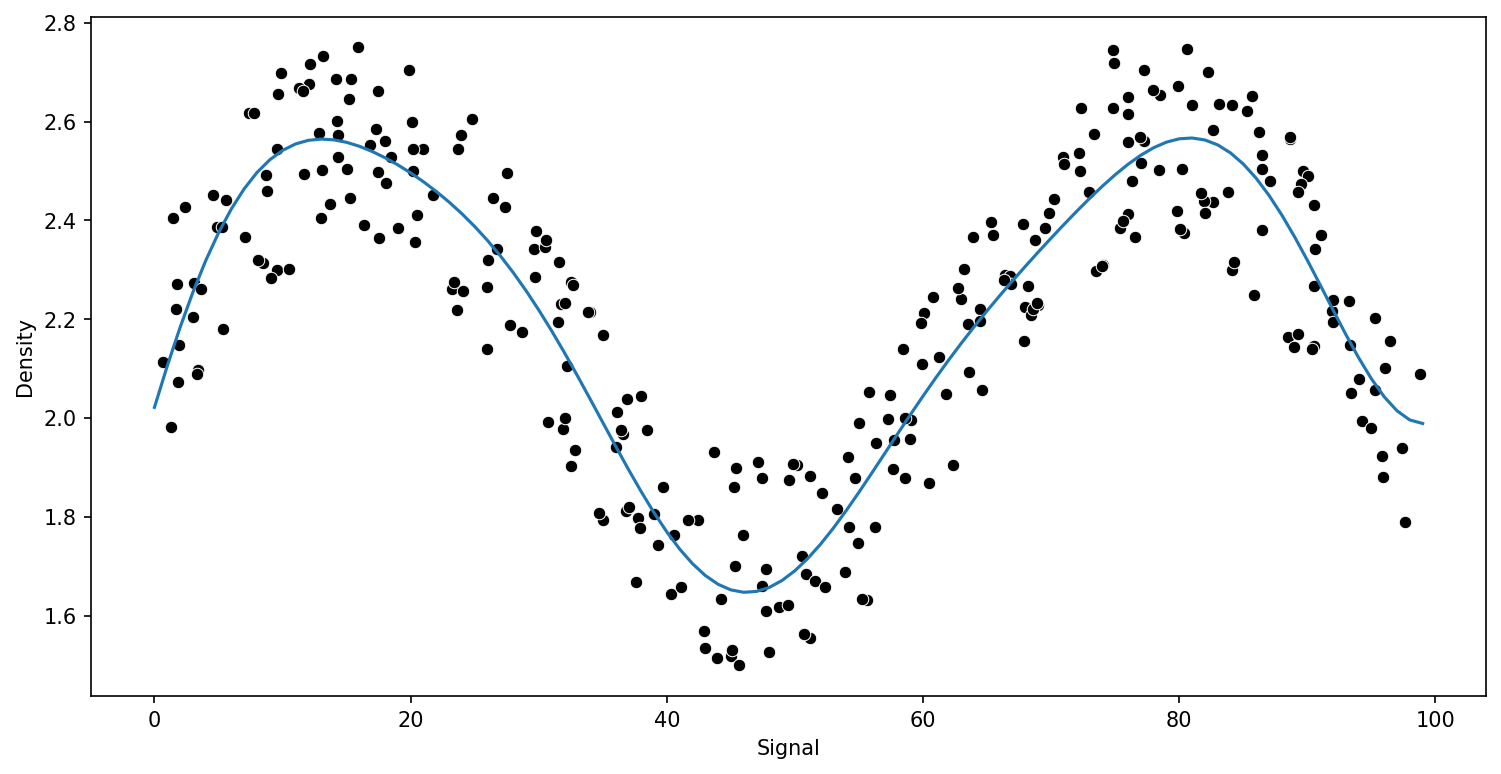

In [34]:
run_model(grid,X_train,y_train,X_test,y_test)

In [35]:
grid.best_estimator_

SVR(C=1000)

In [36]:
grid.best_params_

{'C': 1000, 'gamma': 'scale'}

---

## Random Forest Regression

In [288]:
from sklearn.ensemble import RandomForestRegressor

In [289]:
# help(RandomForestRegressor)

RMSE : 0.1417613358931285
RMSE : 0.133281449397454
RMSE : 0.13699094997283662


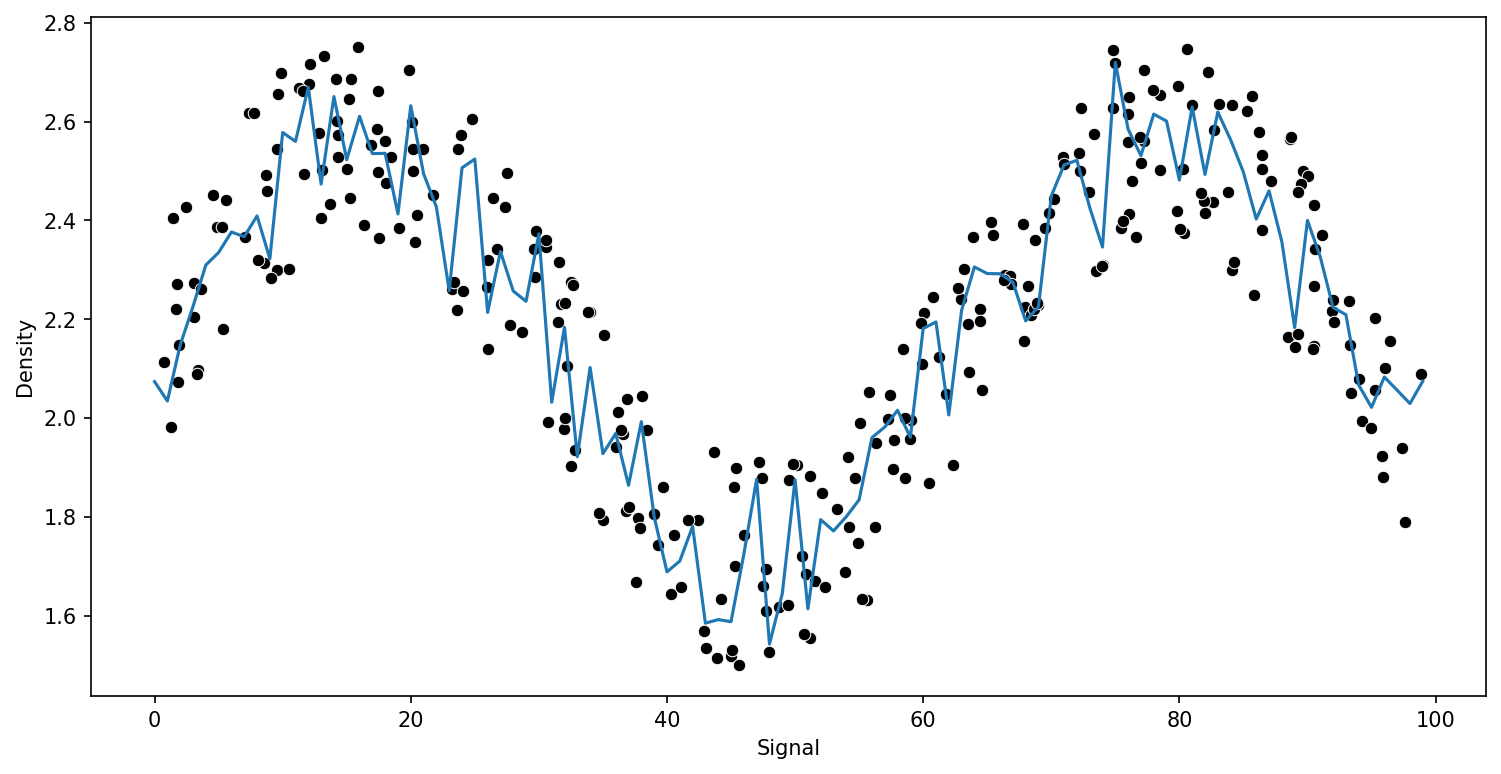

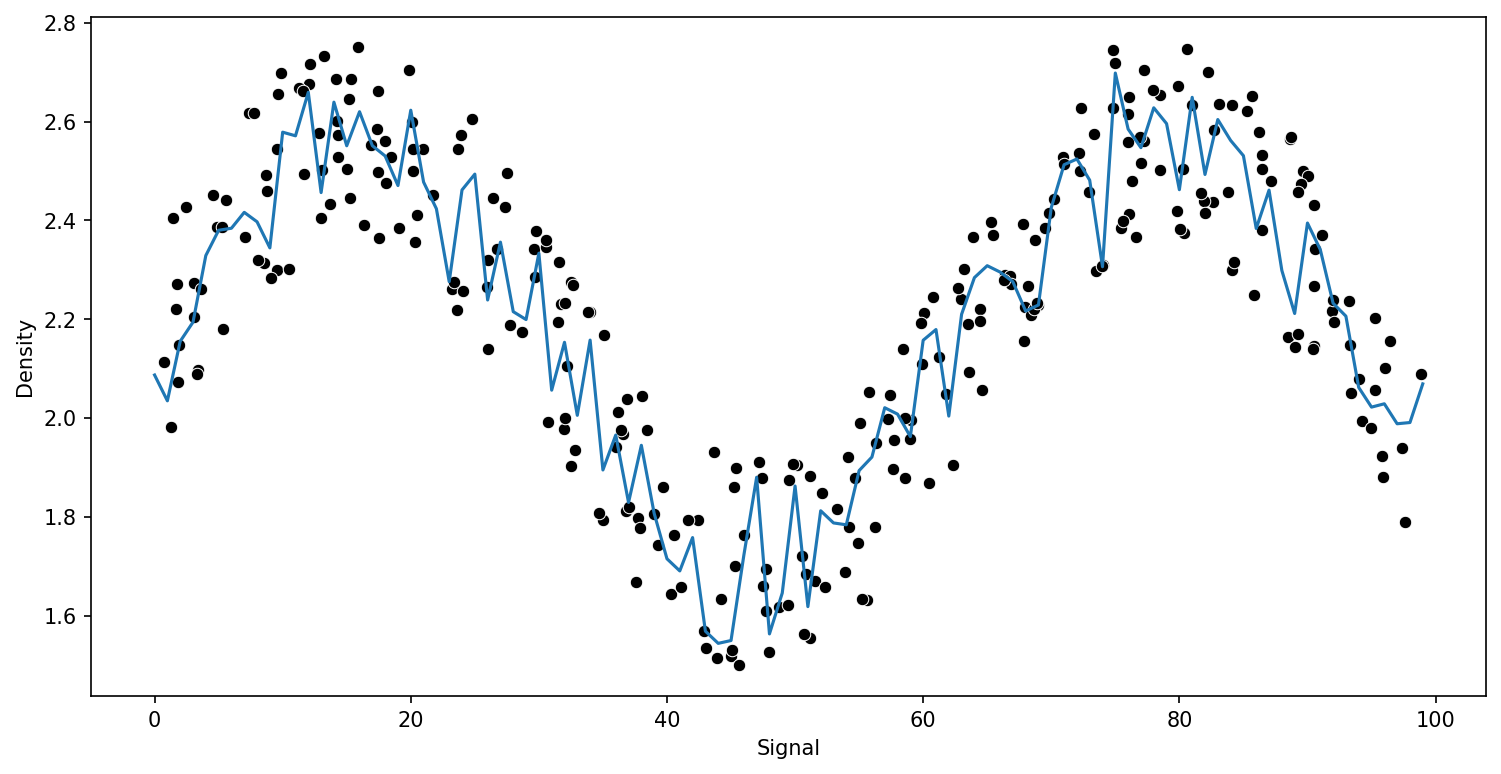

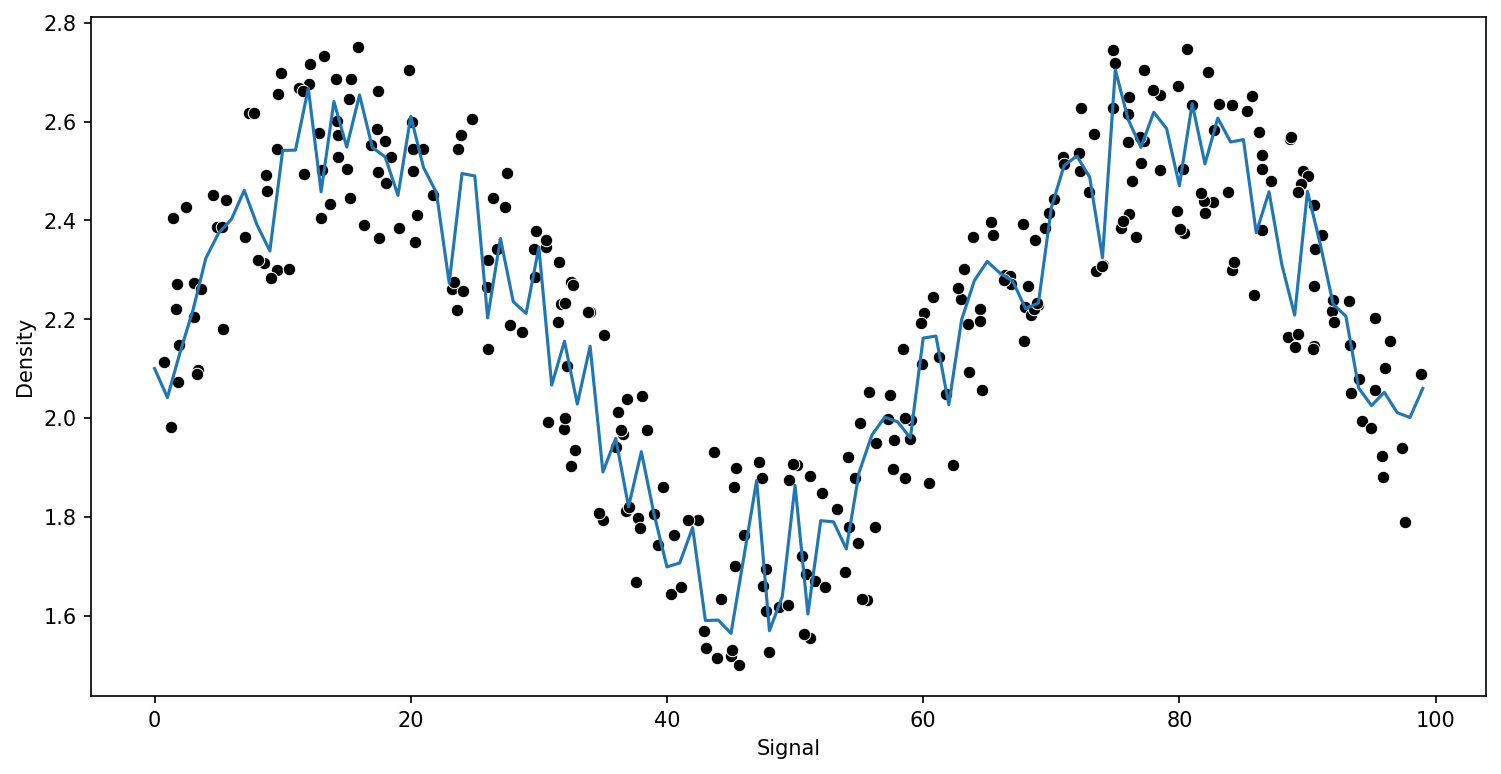

In [290]:
trees = [10,50,100]
for n in trees:
    
    model = RandomForestRegressor(n_estimators=n)
    
    run_model(model,X_train,y_train,X_test,y_test)

## Gradient Boosting

We will cover this in more detail in next section.

In [291]:
from sklearn.ensemble import GradientBoostingRegressor

In [292]:
# help(GradientBoostingRegressor)

RMSE : 0.13294148649584667


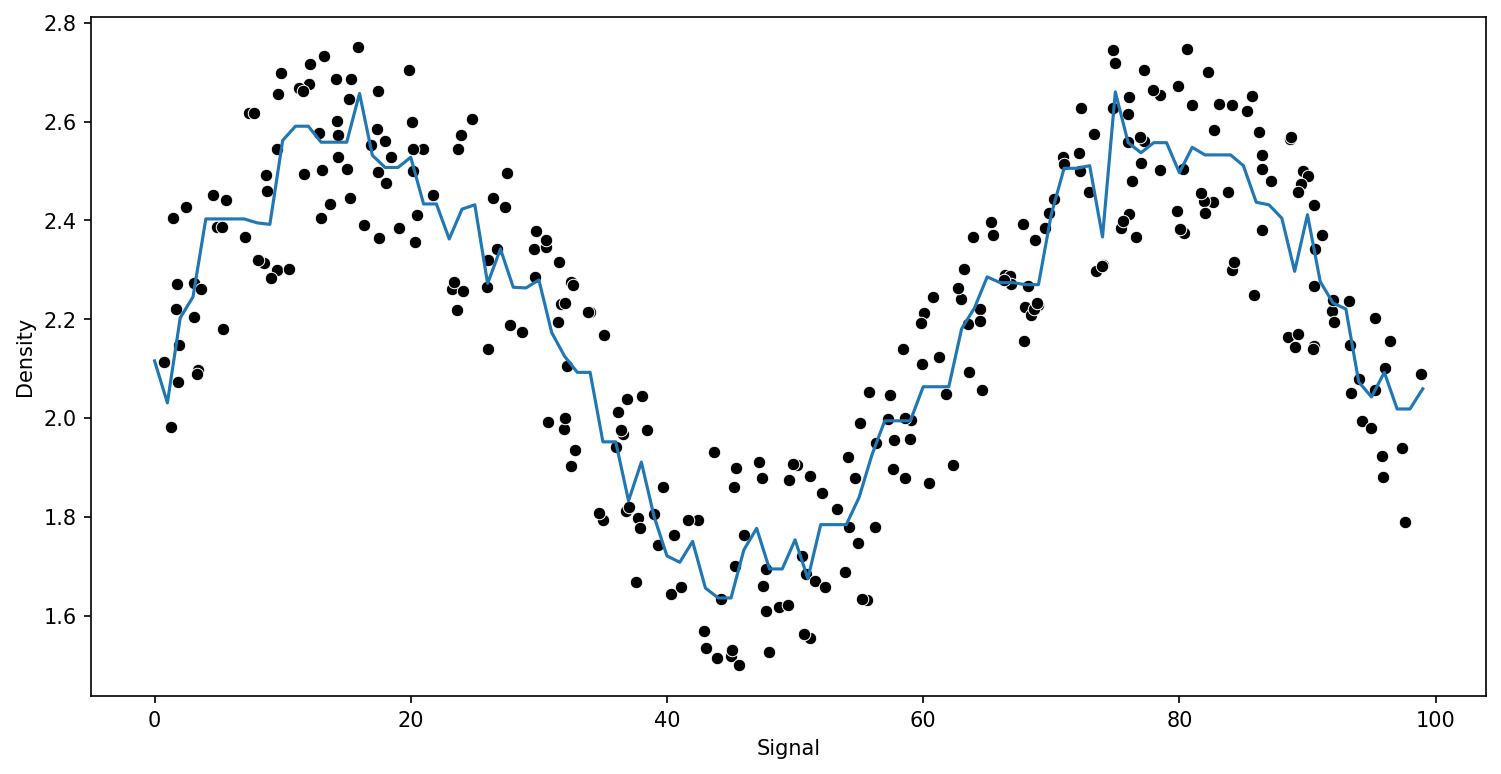

In [293]:
   
model = GradientBoostingRegressor()

run_model(model,X_train,y_train,X_test,y_test)

## Adaboost

In [294]:
from sklearn.ensemble import AdaBoostRegressor

RMSE : 0.13294148649584667


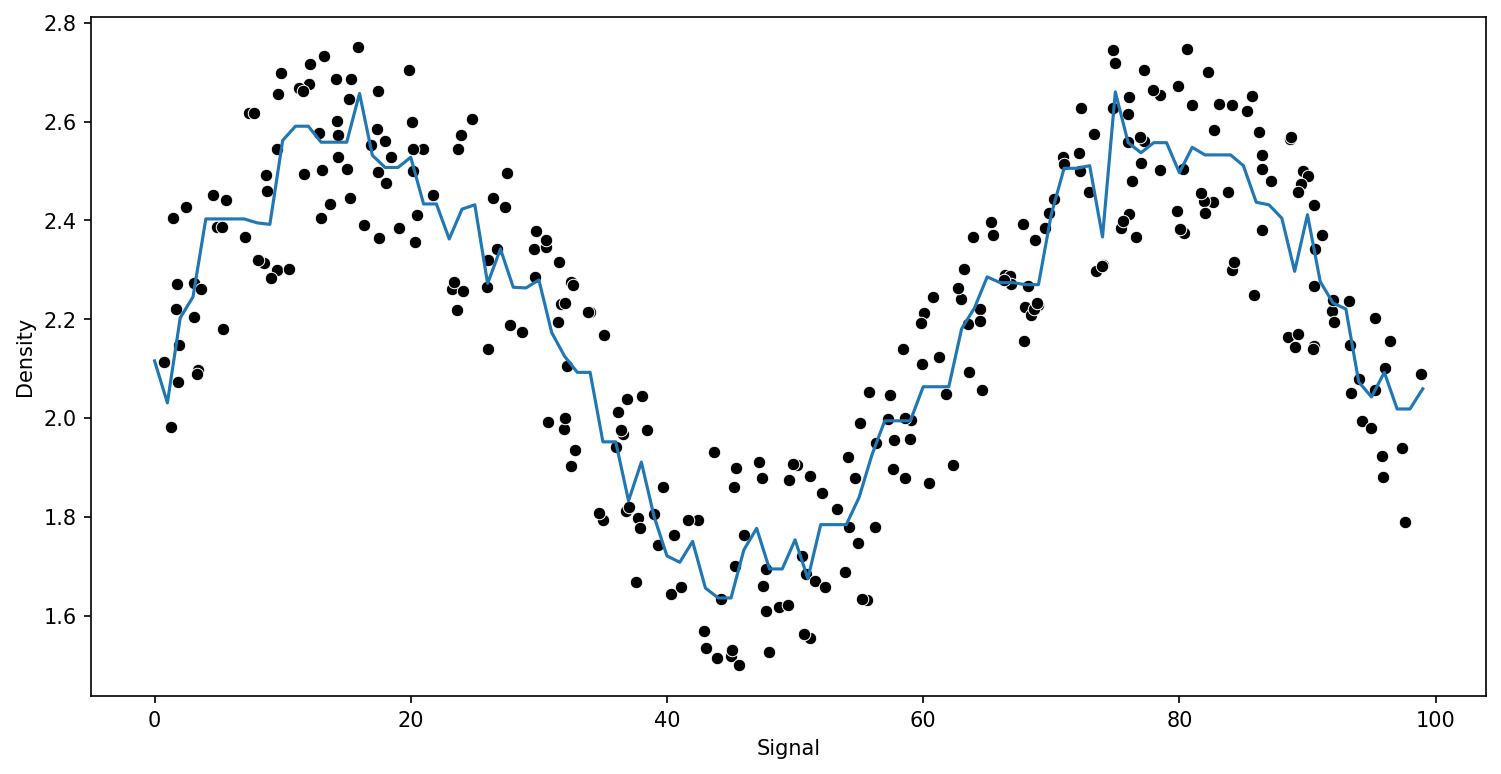

In [295]:
model = GradientBoostingRegressor()

run_model(model,X_train,y_train,X_test,y_test)

----